In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import plotly.express as px
import requests
import numpy as np

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
caminho_csv = 'C:/Users/lucas/OneDrive/Área de Trabalho/dados_seguros/R_AUTO_2021A.csv'
caminho_pkl = 'C:/Users/lucas/OneDrive/Área de Trabalho/dados_seguros/R_AUTO_2021A.pkl'
colunas = ['SEXO', 'TIPO_PES', 'VAL_FRANQ', 'INICIO_VIG', 'FIM_VIG', 'CLAS_BONUS', 'DATA_NASC', 'CEP_UTIL']

# se o arquivo .pkl existir, lê direto dele; senão, lê o CSV e salva o pkl
if os.path.exists(caminho_pkl):
    df = pd.read_pickle(caminho_pkl) #lê o arquivo; ajuste encoding ('utf-8' ou 'latin1'), decimal (',' ou '.') e parse_dates conforme necessário
else:
    df = pd.read_csv(caminho_csv, sep=';', usecols=colunas)
    df.to_pickle(caminho_pkl)


In [4]:
df = pd.read_pickle(caminho_pkl)
df.head()

,TIPO_PES,VAL_FRANQ,INICIO_VIG,FIM_VIG,CLAS_BONUS,SEXO,DATA_NASC,CEP_UTIL
0,J,4823.0,20200713,20210713,4,M,19690226,78850000
1,F,1800.0,20201021,20210706,0,M,19820306,79740000
2,F,518.0,20200715,20210715,0,F,19760522,78700000
3,F,1359.0,20200709,20210709,0,M,19680617,79021000
4,F,2073.0,20200716,20210716,7,F,19680701,79022000


In [5]:
# Supondo que 'df' é o seu DataFrame já carregado

# Lista das colunas que queremos converter
colunas_data = ['INICIO_VIG', 'FIM_VIG', 'DATA_NASC']

for coluna in colunas_data:
    try:
        # Tenta converter usando o formato específico
        df[coluna] = pd.to_datetime(df[coluna], format='%Y%m%d')
        print(f"Coluna '{coluna}' convertida com sucesso.")
    
    except ValueError as e:
        print(f"Erro ao converter '{coluna}': {e}")
        print("Pode haver valores inválidos (ex: '0' ou '99999999').")
        print("Tentando converter com 'errors='coerce'...")
        # 'coerce' transforma datas inválidas em 'NaT' (Not a Time), que é o 'nulo' para datas
        df[coluna] = pd.to_datetime(df[coluna], format='%Y%m%d', errors='coerce')

# Verifique a mudança!
print("\n--- Novos tipos de dados (Dtypes) ---")
# Agora você verá 'datetime64[ns]' nessas colunas
# print(df.info()) 

print("\n--- Head após conversão ---")
# Agora as datas aparecerão em formato padrão (ex: 2020-07-13)
# print(df.head())

Coluna 'INICIO_VIG' convertida com sucesso.
Coluna 'FIM_VIG' convertida com sucesso.
Erro ao converter 'DATA_NASC': time data "0" doesn't match format "%Y%m%d", at position 22. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.
Pode haver valores inválidos (ex: '0' ou '99999999').
Tentando converter com 'errors='coerce'...

--- Novos tipos de dados (Dtypes) ---

--- Head após conversão ---


In [6]:
df_pronto = df

In [7]:
df_pronto.to_csv('df_pronto.csv', index=False)

In [9]:
df_pronto_csv = 'C:/Users/lucas/OneDrive/Área de Trabalho/dados_seguros/df_pronto.csv'
df_pronto_pkl = 'C:/Users/lucas/OneDrive/Área de Trabalho/dados_seguros/df_pronto.pkl'

# se o arquivo .pkl existir, lê direto dele; senão, lê o CSV e salva o pkl
if os.path.exists(df_pronto_pkl):
    df = pd.read_pickle(df_pronto_pkl) #lê o arquivo; ajuste encoding ('utf-8' ou 'latin1'), decimal (',' ou '.') e parse_dates conforme necessário
else:
    df = pd.read_csv(df_pronto_csv, sep=';')
    df.to_pickle(df_pronto_pkl)


In [10]:
df_pronto.head()

,TIPO_PES,VAL_FRANQ,INICIO_VIG,FIM_VIG,CLAS_BONUS,SEXO,DATA_NASC,CEP_UTIL
0,J,4823.0,2020-07-13,2021-07-13,4,M,1969-02-26,78850000
1,F,1800.0,2020-10-21,2021-07-06,0,M,1982-03-06,79740000
2,F,518.0,2020-07-15,2021-07-15,0,F,1976-05-22,78700000
3,F,1359.0,2020-07-09,2021-07-09,0,M,1968-06-17,79021000
4,F,2073.0,2020-07-16,2021-07-16,7,F,1968-07-01,79022000


## GRÁFICOS

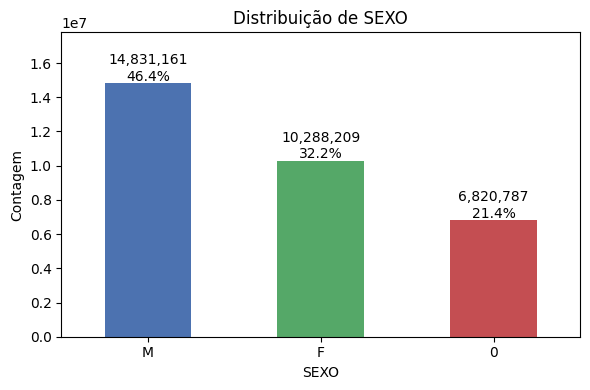

In [13]:
# histograma (contagem) para a coluna categórica 'SEXO'

vc = df_pronto['SEXO'].value_counts(dropna=False)
fig, ax = plt.subplots(figsize=(6,4))
minhas_cores = ['#4c72b0', '#55a868', '#c44e52'] # Azul, Verde, Vermelho (cores comuns de paletas)
# Se 'vc' tiver 3 barras, ele usará as 3 cores.
# Se 'vc' tiver 2 barras (como 'SEXO'), ele usará as 2 primeiras cores.
vc.plot(kind='bar', ax=ax, color=minhas_cores)
ax.set_xlabel('SEXO')
ax.set_ylabel('Contagem')
ax.set_title('Distribuição de SEXO')
ax.set_xticklabels(vc.index, rotation=0)
valor_maximo = vc.max() #Pega o valor máximo (a altura da barra mais alta)

# Define o limite superior do eixo Y como 20% acima do valor máximo
# (você pode ajustar 1.20 para 1.15 ou 1.25 se precisar de mais ou menos espaço)
ax.set_ylim(top=valor_maximo * 1.20)
# --- FIM DA SOLUÇÃO 1 APLICADA ---

# Loop para adicionar as anotações de texto
for i, v in enumerate(vc):
    ax.text(i, v + vc.max()*0.01, f'{v:,}\n{v/len(df):.1%}', ha='center')
    
plt.tight_layout()
plt.show()

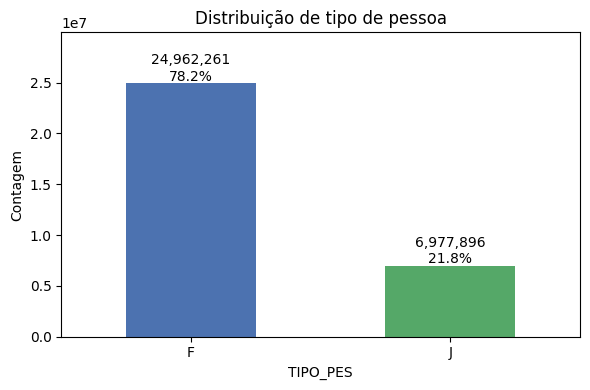

In [14]:
tipo_pessoa = df_pronto['TIPO_PES'].value_counts(dropna=False)
fig, ax = plt.subplots(figsize=(6,4))
tipo_pessoa.plot(kind='bar', ax=ax, color=['#4c72b0', '#55a868'] if len(tipo_pessoa) <= 2 else None)
ax.set_xlabel('TIPO_PES')
ax.set_ylabel('Contagem')
ax.set_title('Distribuição de tipo de pessoa')
ax.set_xticklabels(tipo_pessoa.index, rotation=0)
# Pega o valor máximo (altura da barra 'F')
valor_maximo = tipo_pessoa.max() 

# Define o limite superior do eixo Y como 20% acima do valor máximo
# (você pode ajustar 1.20 para 1.15 ou 1.25 se precisar de mais ou menos espaço)
ax.set_ylim(top=valor_maximo * 1.20)
# --- FIM DA CORREÇÃO ---

# Agora o loop de anotação
for i, v in enumerate(tipo_pessoa):
    ax.text(i, v + tipo_pessoa.max()*0.01, f'{v:,}\n{v/len(df):.1%}', ha='center')

plt.tight_layout()
plt.show()

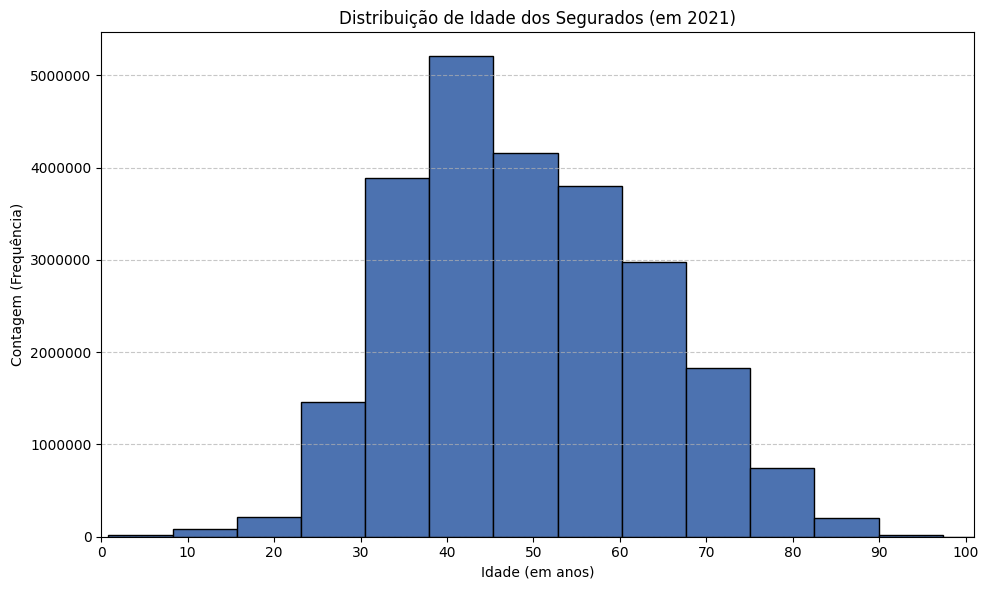

In [16]:
# --- Etapa 1: Calcular a Idade (base 2021) ---
# (Assumindo que 'df' está carregado e 'DATA_NASC' já é datetime)

# Defina a data de referência para o cálculo da idade
data_referencia = pd.to_datetime('2021-12-31')

# Calcula a diferença (dá em Timedelta, ex: "19458 days")
diferenca_tempo = data_referencia - df_pronto['DATA_NASC']

# Converte para anos (float) e depois para inteiro
# (365.25 dias para contar anos bissextos)
df_pronto['IDADE'] = (diferenca_tempo / pd.to_timedelta(365.25, 'D'))

# Vamos ver as primeiras idades calculadas
# print(df[['DATA_NASC', 'IDADE']].head())

# --- Etapa 2: Plotar o Histograma ---

# Remove idades inválidas (ex: se a data de nasc era nula)
idades_validas = df_pronto['IDADE'].dropna()

fig, ax = plt.subplots(figsize=(10, 6)) # Histogramas ficam melhores mais largos

# 'bins=30' divide a faixa de idades em 30 "caixas". 
# 'edgecolor='k'' adiciona uma linha preta fina para separar as barras
ax.hist(idades_validas, bins=30, color='#4c72b0', edgecolor='black')

ax.set_title('Distribuição de Idade dos Segurados (em 2021)')
ax.set_xlabel('Idade (em anos)')
ax.set_ylabel('Contagem (Frequência)')

# Opcional: Adiciona linhas de grade para facilitar a leitura
ax.grid(axis='y', linestyle='--', alpha=0.7)

# 1. Ajuste do Eixo X (Limite)
ax.set_xlim(0, 101) 

# 2. Ajuste do Eixo Y (Notação)
ax.ticklabel_format(style='plain', axis='y')

# 3. NOVO AJUSTE: Mudar o "passo" do Eixo X
#    np.arange(início, fim_exclusive, passo)
#    Usamos 111 para que o 110 seja incluído.
ax.set_xticks(np.arange(0, 101, 10)) 

# --- FIM DOS AJUSTES ---

plt.tight_layout()
plt.show()

In [17]:
# --- (Assumindo que seu DataFrame 'df' já foi carregado) ---
# df = pd.read_csv(...)
# ...

# --- ETAPA 1: Função para converter CEP em UF ---
# Esta função usa as faixas de CEP dos Correios para descobrir o estado

def cep_para_uf(cep):
    """Converte um número de CEP (int) para sua sigla de UF (str)."""
    if pd.isna(cep):
        return None
    
    # Usamos os 5 primeiros dígitos para definir a faixa
    prefixo = int(cep) // 1000 
    
    # Mapeamento de faixas de CEP (5 dígitos) para UFs
    # Fonte: Correios/Wikipedia
    
    if 1000 <= prefixo <= 19999: return 'SP'
    if 20000 <= prefixo <= 28999: return 'RJ'
    if 29000 <= prefixo <= 29999: return 'ES'
    if 30000 <= prefixo <= 39999: return 'MG'
    if 40000 <= prefixo <= 48999: return 'BA'
    if 49000 <= prefixo <= 49999: return 'SE'
    if 50000 <= prefixo <= 56999: return 'PE'
    if 57000 <= prefixo <= 57999: return 'AL'
    if 58000 <= prefixo <= 58999: return 'PB'
    if 59000 <= prefixo <= 59999: return 'RN'
    if 60000 <= prefixo <= 63999: return 'CE'
    if 64000 <= prefixo <= 64999: return 'PI'
    if 65000 <= prefixo <= 65999: return 'MA'
    if 66000 <= prefixo <= 68899: return 'PA'
    if 68900 <= prefixo <= 68999: return 'AP'
    if 69000 <= prefixo <= 69299: return 'AM'
    if 69300 <= prefixo <= 69399: return 'RR'
    if 69400 <= prefixo <= 69899: return 'AM' # Faixa 2 do AM
    if 69900 <= prefixo <= 69999: return 'AC'
    if 70000 <= prefixo <= 72799: return 'DF'
    if 72800 <= prefixo <= 76799: return 'GO'
    if 76800 <= prefixo <= 76999: return 'RO'
    if 77000 <= prefixo <= 77999: return 'TO'
    if 78000 <= prefixo <= 78899: return 'MT'
    if 78900 <= prefixo <= 78999: return 'RO' # Faixa 2 do RO
    if 79000 <= prefixo <= 79999: return 'MS'
    if 80000 <= prefixo <= 87999: return 'PR'
    if 88000 <= prefixo <= 89999: return 'SC'
    if 90000 <= prefixo <= 99999: return 'RS'
    
    return None # CEP não encontrado/inválido

# --- ETAPA 2: Aplicar a função e Agregar ---
# AVISO: .apply() pode ser lento em dataframes muito grandes.
print("Iniciando mapeamento de CEP para UF... Isso pode demorar.")
df_pronto['UF'] = df_pronto['CEP_UTIL'].apply(cep_para_uf)
print("Mapeamento concluído.")

# Contar os seguros por UF e preparar para o Plotly
contagem_uf = df_pronto['UF'].value_counts().reset_index()
contagem_uf.columns = ['UF', 'Contagem']

# Remover UFs nulas (CEPs que a função não conseguiu mapear)
contagem_uf = contagem_uf.dropna(subset=['UF'])

print("\nContagem de seguros por UF (Top 5):")
print(contagem_uf.head())


# --- ETAPA 3: Plotar o Mapa (Choropleth) ---

# URL para o "molde" do mapa do Brasil (arquivo GeoJSON)
url_geojson = "https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson"

# Tentar baixar o arquivo de mapa
try:
    print("\nBaixando o molde do mapa do Brasil (GeoJSON)...")
    geojson_br = requests.get(url_geojson).json()
    print("Mapa baixado com sucesso.")

    # Criar o mapa de calor (Choropleth)
    fig = px.choropleth_mapbox(
        contagem_uf,
        geojson=geojson_br,
        locations='UF',         # Coluna no DataFrame com a sigla (SP, MG...)
        featureidkey="properties.sigla", # Caminho no GeoJSON para a sigla
        color='Contagem',       # Coluna com os valores para a cor
        color_continuous_scale="Viridis", # Esquema de cores
        mapbox_style="carto-positron",    # Estilo do mapa de fundo (claro)
        zoom=3.2,                 # Nível de zoom inicial
        center={"lat": -15.79, "lon": -47.88}, # Centro do Brasil (Brasília)
        opacity=0.7,
        title="Distribuição de Seguros por Estado (UF)"
    )
    
    fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
    
    # --- Saída ---
    # Salvar o mapa como um arquivo HTML interativo
    nome_arquivo = "mapa_seguros_por_uf.html"
    fig.write_html(nome_arquivo)
    
    print(f"\n--- SUCESSO! ---")
    print(f"Mapa salvo como '{nome_arquivo}'.")
    print("Abra este arquivo no seu navegador (Chrome, Firefox, etc.) para ver o mapa interativo.")

except Exception as e:
    print(f"\n--- ERRO ---")
    print(f"Não foi possível baixar ou processar o mapa: {e}")
    print("Por favor, verifique sua conexão com a internet e se as bibliotecas 'plotly' e 'requests' estão instaladas.")

Iniciando mapeamento de CEP para UF... Isso pode demorar.
Mapeamento concluído.

Contagem de seguros por UF (Top 5):
   UF  Contagem
0  SP   8962226
1  MG   3071304
2  PR   2593895
3  RS   2466825
4  SC   1812557

Baixando o molde do mapa do Brasil (GeoJSON)...
Mapa baixado com sucesso.


C:\Users\lucas\AppData\Local\Temp\ipykernel_38796\1328284505.py:80: DeprecationWarning: *choropleth_mapbox* is deprecated! Use *choropleth_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/
  fig = px.choropleth_mapbox(



--- SUCESSO! ---
Mapa salvo como 'mapa_seguros_por_uf.html'.
Abra este arquivo no seu navegador (Chrome, Firefox, etc.) para ver o mapa interativo.


# Mapa com Siglas

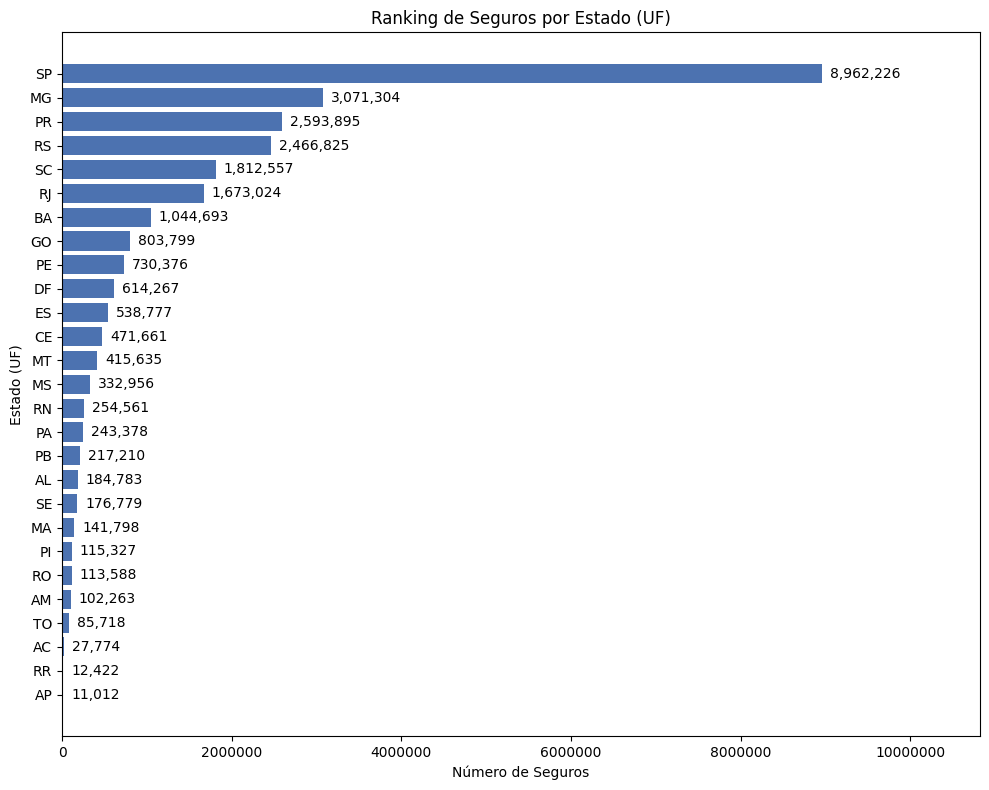

In [18]:

# Só vai rodar se você já rodou o código do mapa e 'contagem_uf' está na memória.
# Caso contrário, certifique-se que df['UF'] existe.

# 1. Ordenar o DataFrame pela contagem para o ranking
# .sort_values(by='Contagem', ascending=True) coloca o menor no topo para que o maior fique na base do gráfico (leitura natural)
contagem_uf_rank = contagem_uf.sort_values(by='Contagem', ascending=True)

fig, ax = plt.subplots(figsize=(10, 8)) # Ajuste o tamanho para caber todos os estados

# 2. Criar o gráfico de barras horizontais
bars = ax.barh(contagem_uf_rank['UF'], contagem_uf_rank['Contagem'], color='#4c72b0')

ax.set_title('Ranking de Seguros por Estado (UF)')
ax.set_xlabel('Número de Seguros')
ax.set_ylabel('Estado (UF)')

# 3. Adicionar os valores nas barras (para facilitar a leitura)
# Itera sobre cada barra para colocar o texto ao lado
for bar in bars:
    width = bar.get_width() # Pega o tamanho da barra
    ax.text(width + ax.get_xlim()[1]*0.01, # Posição X: largura da barra + pequena margem
            bar.get_y() + bar.get_height()/2, # Posição Y: centro da barra
            f'{int(width):,}', # Formata o número com vírgulas
            ha='left', va='center') # Alinhamento do texto

# 4. Ajustar o eixo X para que os números não sejam cortados
# Pega o limite atual e estende um pouco para a direita
ax.set_xlim(right=ax.get_xlim()[1] * 1.15) # Aumenta o limite direito em 15%

# 5. Remover notação científica do eixo X
ax.ticklabel_format(style='plain', axis='x')

plt.tight_layout() # Ajusta automaticamente o layout
plt.show()

# Mapa com nome por extenso

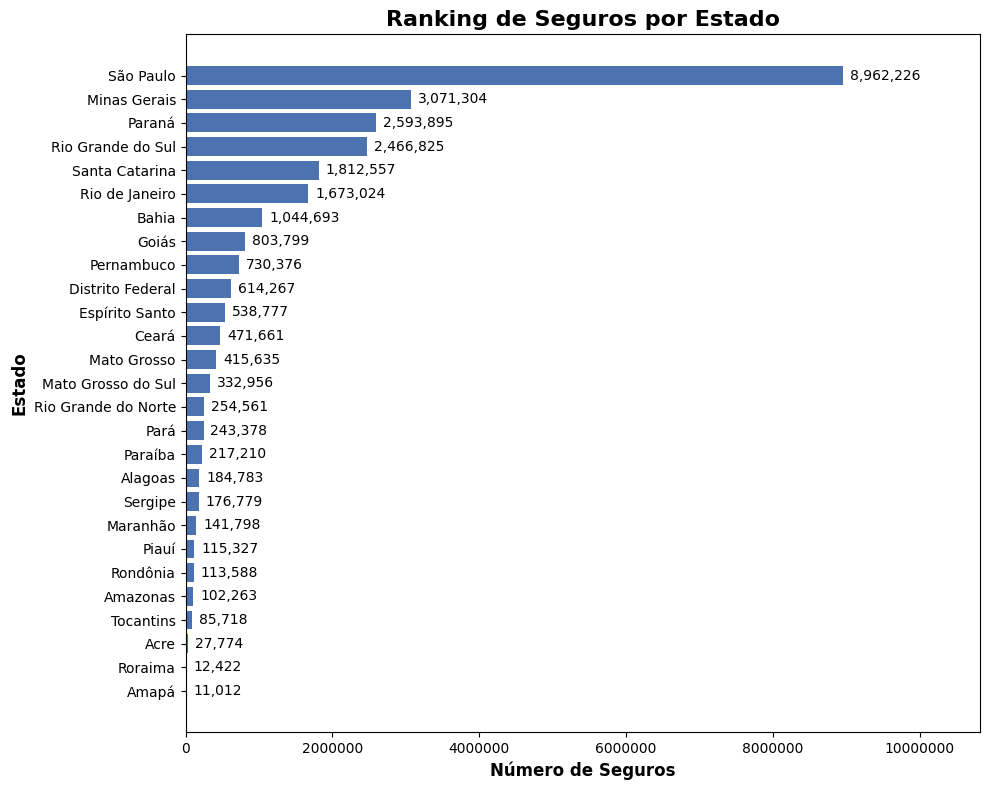

In [20]:
# --- 1. DICIONÁRIO DE MAPEAMENTO (Sigla -> Nome Completo) ---
mapa_uf_nome = {
    'AC': 'Acre', 'AL': 'Alagoas', 'AP': 'Amapá', 'AM': 'Amazonas',
    'BA': 'Bahia', 'CE': 'Ceará', 'DF': 'Distrito Federal', 'ES': 'Espírito Santo',
    'GO': 'Goiás', 'MA': 'Maranhão', 'MT': 'Mato Grosso', 'MS': 'Mato Grosso do Sul',
    'MG': 'Minas Gerais', 'PA': 'Pará', 'PB': 'Paraíba', 'PR': 'Paraná',
    'PE': 'Pernambuco', 'PI': 'Piauí', 'RJ': 'Rio de Janeiro',
    'RN': 'Rio Grande do Norte', 'RS': 'Rio Grande do Sul', 'RO': 'Rondônia',
    'RR': 'Roraima', 'SC': 'Santa Catarina', 'SP': 'São Paulo',
    'SE': 'Sergipe', 'TO': 'Tocantins'
}

# --- 2. PREPARAÇÃO DOS DADOS (Recriando a contagem por UF) ---
# (Garante que o código funcione mesmo se o kernel foi reiniciado)
if 'UF' not in df_pronto.columns:
    print("Mapeando CEP para UF novamente...")
    def cep_para_uf(cep):
        if pd.isna(cep): return None
        prefixo = int(cep) // 1000 
        if 1000 <= prefixo <= 19999: return 'SP'
        if 20000 <= prefixo <= 28999: return 'RJ'
        if 29000 <= prefixo <= 29999: return 'ES'
        if 30000 <= prefixo <= 39999: return 'MG'
        if 40000 <= prefixo <= 48999: return 'BA'
        if 49000 <= prefixo <= 49999: return 'SE'
        if 50000 <= prefixo <= 56999: return 'PE'
        if 57000 <= prefixo <= 57999: return 'AL'
        if 58000 <= prefixo <= 58999: return 'PB'
        if 59000 <= prefixo <= 59999: return 'RN'
        if 60000 <= prefixo <= 63999: return 'CE'
        if 64000 <= prefixo <= 64999: return 'PI'
        if 65000 <= prefixo <= 65999: return 'MA'
        if 66000 <= prefixo <= 68899: return 'PA'
        if 68900 <= prefixo <= 68999: return 'AP'
        if 69000 <= prefixo <= 69299: return 'AM'
        if 69300 <= prefixo <= 69399: return 'RR'
        if 69400 <= prefixo <= 69899: return 'AM'
        if 69900 <= prefixo <= 69999: return 'AC'
        if 70000 <= prefixo <= 72799: return 'DF'
        if 72800 <= prefixo <= 76799: return 'GO'
        if 76800 <= prefixo <= 76999: return 'RO'
        if 77000 <= prefixo <= 77999: return 'TO'
        if 78000 <= prefixo <= 78899: return 'MT'
        if 78900 <= prefixo <= 78999: return 'RO'
        if 79000 <= prefixo <= 79999: return 'MS'
        if 80000 <= prefixo <= 87999: return 'PR'
        if 88000 <= prefixo <= 89999: return 'SC'
        if 90000 <= prefixo <= 99999: return 'RS'
        return None 
    
    df_pronto['UF'] = df_pronto['CEP_UTIL'].apply(cep_para_uf)

contagem_uf = df_pronto['UF'].value_counts().reset_index()
contagem_uf.columns = ['UF', 'Contagem']
contagem_uf = contagem_uf.dropna(subset=['UF'])

# --- 3. A MÁGICA (Criar a nova coluna de nomes) ---
# Usa o dicionário para "traduzir" a coluna 'UF'
contagem_uf['Estado_Nome'] = contagem_uf['UF'].map(mapa_uf_nome)

# 4. Ordenar o DataFrame pela contagem
contagem_uf_rank = contagem_uf.sort_values(by='Contagem', ascending=True)

# --- 5. PLOTAGEM (Usando a coluna 'Estado_Nome') ---
fig, ax = plt.subplots(figsize=(10, 8)) 

# *** A MUDANÇA ESTÁ AQUI: usamos 'Estado_Nome' no eixo Y ***
bars = ax.barh(contagem_uf_rank['Estado_Nome'], contagem_uf_rank['Contagem'], color='#4c72b0')

#LABELS
ax.set_title('Ranking de Seguros por Estado', fontsize=16, fontweight='bold')
# Rótulo do Eixo X (Horizontal)
ax.set_xlabel('Número de Seguros', fontsize=12, fontweight='bold')
# Rótulo do Eixo Y (Vertical)
ax.set_ylabel('Estado', fontsize=12, fontweight='bold')

# Adicionar os valores nas barras
for bar in bars:
    width = bar.get_width()
    ax.text(width + ax.get_xlim()[1]*0.01, 
            bar.get_y() + bar.get_height()/2,
            f'{int(width):,}',
            ha='left', va='center')

# Ajustar o eixo X para caber os rótulos de texto
ax.set_xlim(right=ax.get_xlim()[1] * 1.15) 

# Remover notação científica do eixo X
ax.ticklabel_format(style='plain', axis='x')

plt.tight_layout()
fig.savefig('ranking_seguros_por_estado.png', dpi=300, bbox_inches='tight') 
plt.show()

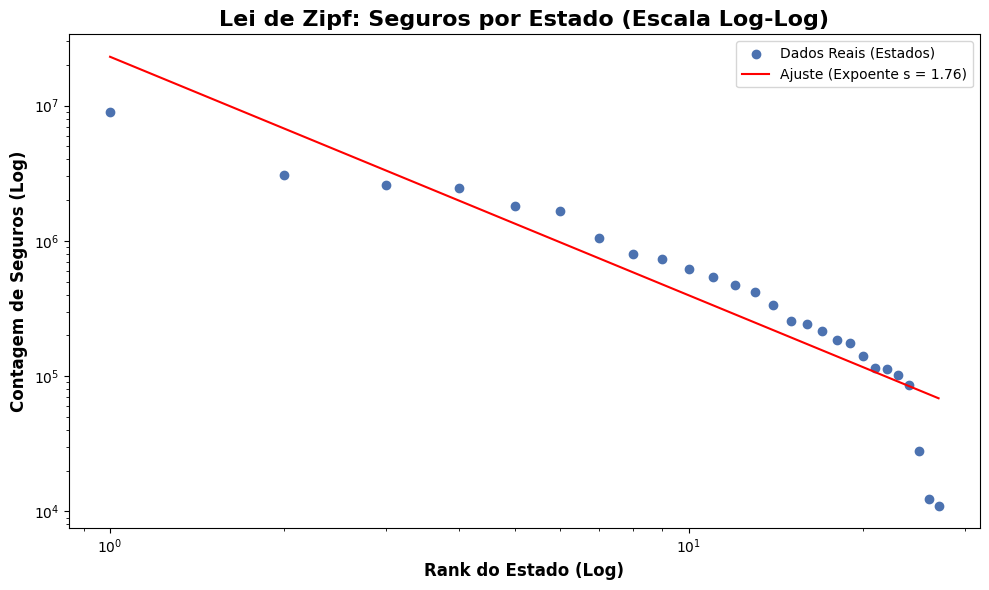

Gráfico da Lei de Zipf gerado.
O expoente 's' calculado para a distribuição é: 1.7639
Este valor indica uma distribuição de lei de potência (power law).


In [21]:
# Ordenar pela contagem, DECRESCENTE (do maior para o menor)
zipf_data = contagem_uf.sort_values(by='Contagem', ascending=False)

# Criar a coluna 'Rank' (1, 2, 3, ... 27)
zipf_data['Rank'] = np.arange(1, len(zipf_data) + 1)
zipf_data = zipf_data[['Rank', 'Contagem']]

# --- 3. CÁLCULO DA RETA DE AJUSTE (BÔNUS) ---
# Em um gráfico log-log, uma lei de potência vira uma reta:
# log(Contagem) = log(C) - s * log(Rank)
# Vamos usar polyfit (regressão linear) para achar o 's' (o slope)

# Pegar os valores em log10
log_rank = np.log10(zipf_data['Rank'])
log_contagem = np.log10(zipf_data['Contagem'])

# Ajustar uma reta (polinômio de grau 1)
# slope = -s, intercept = log(C)
slope, intercept = np.polyfit(log_rank, log_contagem, 1)

# Calcular os valores da reta de ajuste (ainda em log)
fit_line_log = slope * log_rank + intercept

# Converter de volta para a escala normal para plotar
fit_line = 10**fit_line_log
expoente_s = -slope # O expoente 's' da Lei de Zipf

# --- 4. PLOTAGEM DO GRÁFICO LOG-LOG ---
fig, ax = plt.subplots(figsize=(10, 6))

# Plotar os dados reais (pontos)
ax.scatter(zipf_data['Rank'], zipf_data['Contagem'], 
           label='Dados Reais (Estados)', color='#4c72b0')

# Plotar a reta de ajuste (linha tracejada)
ax.plot(zipf_data['Rank'], fit_line, 
        label=f'Ajuste (Expoente s = {expoente_s:.2f})', 
        color='red', linestyle='solid')

# --- 5. FORMATAÇÃO DO GRÁFICO ---
# ESTA É A PARTE MAIS IMPORTANTE: MUDAR AS ESCALAS
ax.set_xscale('log')
ax.set_yscale('log')

# Títulos e Rótulos (com negrito, como você gosta)
ax.set_title('Lei de Zipf: Seguros por Estado (Escala Log-Log)', 
             fontsize=16, fontweight='bold')
ax.set_xlabel('Rank do Estado (Log)', fontsize=12, fontweight='bold')
ax.set_ylabel('Contagem de Seguros (Log)', fontsize=12, fontweight='bold')

ax.legend()
# Adicionar grid para facilitar a leitura em log
#ax.grid(True, which="both", ls="--", alpha=0.5)

plt.tight_layout()
fig.savefig('grafico_lei_de_zipf_estados.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Gráfico da Lei de Zipf gerado.")
print(f"O expoente 's' calculado para a distribuição é: {expoente_s:.4f}")
if abs(expoente_s - 1) < 0.2:
    print("Este valor é próximo de 1, o que é um forte indicativo de uma distribuição de Zipf clássica!")
else:
    print("Este valor indica uma distribuição de lei de potência (power law).")

In [16]:
# Um S maior > 1 (como o 1.76 encontrado) significa uma "queda" mais íngreme. Isso nos diz que a concentração de seguros no Rank 1 (provavelmente São Paulo) é 
# dramaticamente maior que no Rank 2. A diferença entre o Rank 1 e o Rank 2 é muito mais significativa do que a diferença entre o Rank 10 e o Rank 11.

# A "cauda longa" (long tail) é "curta"A distribuição decai tão rápido que os estados com menos seguros (o fim da cauda) têm uma participação quase insignificante 
# em comparação com os estados do topo.

## IGNORAR POR ENQUANTO

In [25]:
import brazilcep # <--- Correto
from geopy.geocoders import Nominatim

def cep_para_coords(cep):
    """Converte um CEP em coordenadas (latitude, longitude)."""

    # 1. Obter o endereço a partir do CEP
    try:
        # Usa a função correta do brazilcep
        endereco_data = brazilcep.get_address_from_cep(cep) 
        if not endereco_data:
            return None
    except Exception as e:
        print(f"Erro ao buscar endereço para o CEP {cep}: {e}")
        return None

    # (O resto da sua função com o Nominatim está perfeito...)
    logradouro = endereco_data.get('street', '') # 'street' é a chave no brazilcep
    bairro = endereco_data.get('district', '')     # 'district'
    cidade = endereco_data.get('city', '')       # 'city'
    uf = endereco_data.get('uf', '')             # 'uf'

    endereco_completo = f"{logradouro}, {bairro}, {cidade} - {uf}"

    # 2. Usar geopy para obter as coordenadas
    geolocator = Nominatim(user_agent="meu_app_geolocalizacao")
    try:
        localizacao = geolocator.geocode(endereco_completo)
        if localizacao:
            return localizacao.latitude, localizacao.longitude
        else:
            print(f"Não foi possível encontrar a geolocalização para: {endereco_completo}")
            return None
    except Exception as e:
        print(f"Erro ao geocodificar o endereço {endereco_completo}: {e}")
        return None

ModuleNotFoundError: No module named 'brazilcep'

In [26]:
meu_cep = df_pronto['CEP_UTIL'] # Substitua pelo CEP desejado
coordenadas = cep_para_coords(meu_cep)

if coordenadas:
    latitude, longitude = coordenadas
    print(f"CEP: {meu_cep}")
    print(f"Latitude: {latitude}")
    print(f"Longitude: {longitude}")
else:
    print(f"Não foi possível obter as coordenadas para o CEP {meu_cep}")


NameError: name 'cep_para_coords' is not defined

## NOVA TENTATIVA

In [27]:
ceps_to_coordenades = pd.read_csv('C:/Users/lucas/OneDrive/Área de Trabalho/dados_seguros/cep_brasil_2018.csv', encoding='latin1', usecols=['cep', 'cidade', 'latitude', 'longitude'])

In [28]:
ceps_to_coordenades.head()

,cep,cidade,latitude,longitude
0,1001000,São Paulo,-23.550278,-46.634218
1,1001001,São Paulo,-23.549865,-46.634020
2,1001010,São Paulo,-23.551479,-46.633272
3,1001900,São Paulo,-23.549896,-46.634378
4,1001901,São Paulo,-23.551829,-46.634234


In [29]:
# Verifique os tipos atuais (opcional, mas bom saber)
print(f"Tipo do 'CEP_UTIL': {df_pronto['CEP_UTIL'].dtype}")
print(f"Tipo do 'cep': {ceps_to_coordenades['cep'].dtype}")

# --- Correção Garantida ---
# Força AMBAS as colunas-chave a serem do tipo 'string'
# Isso garante que 79021000 (int) possa corresponder a '79021000' (str)
df_pronto['CEP_UTIL'] = df_pronto['CEP_UTIL'].astype(str)
ceps_to_coordenades['cep'] = ceps_to_coordenades['cep'].astype(str)

print("Tipos de dados alinhados para 'string'. Pronto para o merge.")

Tipo do 'CEP_UTIL': int64
Tipo do 'cep': int64
Tipos de dados alinhados para 'string'. Pronto para o merge.


In [30]:
df_final = pd.merge(df_pronto, ceps_to_coordenades, 
                      left_on='CEP_UTIL', 
                      right_on=['cep'], 
                      how='left')

df_final.head()

,TIPO_PES,VAL_FRANQ,INICIO_VIG,FIM_VIG,CLAS_BONUS,SEXO,DATA_NASC,CEP_UTIL,IDADE,UF,cep,cidade,latitude,longitude
0,J,4823.0,2020-07-13,2021-07-13,4,M,1969-02-26,78850000,52.843258,MT,78850000,Primavera do Leste,-15.560531,-54.295068
1,F,1800.0,2020-10-21,2021-07-06,0,M,1982-03-06,79740000,39.822040,MS,79740000,Ivinhema,-22.305036,-53.818913
2,F,518.0,2020-07-15,2021-07-15,0,F,1976-05-22,78700000,45.609856,MT,NaN,NaN,NaN,NaN
3,F,1359.0,2020-07-09,2021-07-09,0,M,1968-06-17,79021000,53.538672,MS,79021000,Campo Grande,-20.454798,-54.593020
4,F,2073.0,2020-07-16,2021-07-16,7,F,1968-07-01,79022000,53.500342,MS,79022000,Campo Grande,-20.438029,-54.597956


In [31]:
df_final.shape

(31940157, 14)

In [32]:
df_final.to_csv('df_final.csv', index=False)

In [33]:
df_final_csv = 'C:/Users/lucas/OneDrive/Área de Trabalho/dados_seguros/df_final.csv'
df_final_pkl = 'C:/Users/lucas/OneDrive/Área de Trabalho/dados_seguros/df_final.pkl'

# se o arquivo .pkl existir, lê direto dele; senão, lê o CSV e salva o pkl
if os.path.exists(df_final_pkl):
    df = pd.read_pickle(df_final_pkl) #lê o arquivo; ajuste encoding ('utf-8' ou 'latin1'), decimal (',' ou '.') e parse_dates conforme necessário
else:
    df = pd.read_csv(df_final_csv, sep=';')
    df.to_pickle(df_final_pkl)

In [34]:
# Contar quantos valores nulos (NaN) existem na coluna 'latitude'
# (Se for nulo na 'latitude', também será na 'longitude')
nulos = df_final['latitude'].isnull().sum()
total = len(df_final)

print(f"Total de linhas no DataFrame final: {total:,}")
print(f"Linhas sem coordenadas (NaN): {nulos:,}")
print(f"Porcentagem de dados perdidos: {(nulos / total) * 100:.2f}%")

Total de linhas no DataFrame final: 31,940,157
Linhas sem coordenadas (NaN): 8,136,672
Porcentagem de dados perdidos: 25.47%


In [35]:
# Agrupa pelos CEPs que resultaram em NaN e conta quais são os mais comuns
ceps_que_falharam = df_final[df_final['latitude'].isnull()]['CEP_UTIL'].value_counts()
print("\nOs 10 CEPs que mais falharam em encontrar coordenadas:")
print(ceps_que_falharam.head(10))


Os 10 CEPs que mais falharam em encontrar coordenadas:
CEP_UTIL
0           4721538
1000000      219843
20000000      22050
13000000      16476
80000000      16283
88000000      16135
29101000      15955
88330000      14744
38420000      14324
38400000      13812
Name: count, dtype: int64


In [36]:
# Cria um novo DataFrame 'df_mapeado'
# dropna() remove linhas
# subset=['latitude', 'longitude'] diz para ele remover a linha SOMENTE
# se houver NaN especificamente nessas colunas.
df_mapeado = df_final.dropna(subset=['latitude', 'longitude'])

# Verifique o resultado
print(f"\nFormato original (linhas, colunas): {df_final.shape}")
print(f"Formato após limpeza (linhas, colunas): {df_mapeado.shape}")


Formato original (linhas, colunas): (31940157, 14)
Formato após limpeza (linhas, colunas): (23803485, 14)


In [37]:
df_mapeado.to_csv('df_mapeado.csv', index=False)

In [38]:
df_mapeado_csv = 'C:/Users/lucas/OneDrive/Área de Trabalho/dados_seguros/df_mapeado.csv'
df_mapeado_pkl = 'C:/Users/lucas/OneDrive/Área de Trabalho/dados_seguros/df_mapeado.pkl'

# se o arquivo .pkl existir, lê direto dele; senão, lê o CSV e salva o pkl
if os.path.exists(df_mapeado_pkl):
    df = pd.read_pickle(df_mapeado_pkl) #lê o arquivo; ajuste encoding ('utf-8' ou 'latin1'), decimal (',' ou '.') e parse_dates conforme necessário
else:
    df = pd.read_csv(df_mapeado_csv, sep=';')
    df.to_pickle(df_mapeado_pkl)

##  NOVOS GRÁFICOS UTILIZANDO O DF MAPEADO 

In [ ]:
# Será utilizado esse novo data frame pois existem muitos dados com CEP sem correspondencia, o que poderia ocasionar em dados falsos ou incoerentes, como a base de dados é grande, a perda de alguns dados não afetará significativamente as análises futuras.

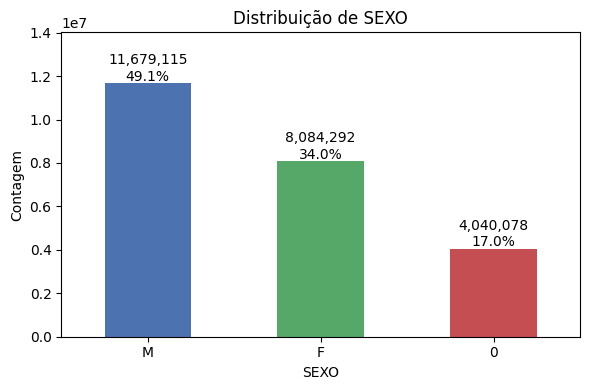

In [44]:
# histograma (contagem) para a coluna categórica 'SEXO'

vc = df_mapeado['SEXO'].value_counts(dropna=False)
fig, ax = plt.subplots(figsize=(6,4))
minhas_cores = ['#4c72b0', '#55a868', '#c44e52'] # Azul, Verde, Vermelho (cores comuns de paletas)
# Se 'vc' tiver 3 barras, ele usará as 3 cores.
# Se 'vc' tiver 2 barras (como 'SEXO'), ele usará as 2 primeiras cores.
vc.plot(kind='bar', ax=ax, color=minhas_cores)
ax.set_xlabel('SEXO')
ax.set_ylabel('Contagem')
ax.set_title('Distribuição de SEXO')
ax.set_xticklabels(vc.index, rotation=0)
valor_maximo = vc.max() #Pega o valor máximo (a altura da barra mais alta)

# Define o limite superior do eixo Y como 20% acima do valor máximo
# (você pode ajustar 1.20 para 1.15 ou 1.25 se precisar de mais ou menos espaço)
ax.set_ylim(top=valor_maximo * 1.20)
# --- FIM DA SOLUÇÃO 1 APLICADA ---

# Loop para adicionar as anotações de texto
for i, v in enumerate(vc):
    ax.text(i, v + vc.max()*0.01, f'{v:,}\n{v/len(df):.1%}', ha='center')
    
plt.tight_layout()
plt.show()

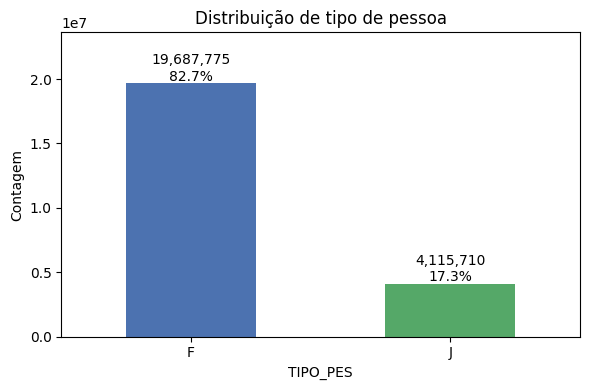

In [45]:
tipo_pessoa = df_mapeado['TIPO_PES'].value_counts(dropna=False)
fig, ax = plt.subplots(figsize=(6,4))
tipo_pessoa.plot(kind='bar', ax=ax, color=['#4c72b0', '#55a868'] if len(tipo_pessoa) <= 2 else None)
ax.set_xlabel('TIPO_PES')
ax.set_ylabel('Contagem')
ax.set_title('Distribuição de tipo de pessoa')
ax.set_xticklabels(tipo_pessoa.index, rotation=0)
# Pega o valor máximo (altura da barra 'F')
valor_maximo = tipo_pessoa.max() 

# Define o limite superior do eixo Y como 20% acima do valor máximo
# (você pode ajustar 1.20 para 1.15 ou 1.25 se precisar de mais ou menos espaço)
ax.set_ylim(top=valor_maximo * 1.20)
# --- FIM DA CORREÇÃO ---

# Agora o loop de anotação
for i, v in enumerate(tipo_pessoa):
    ax.text(i, v + tipo_pessoa.max()*0.01, f'{v:,}\n{v/len(df):.1%}', ha='center')

plt.tight_layout()
plt.show()

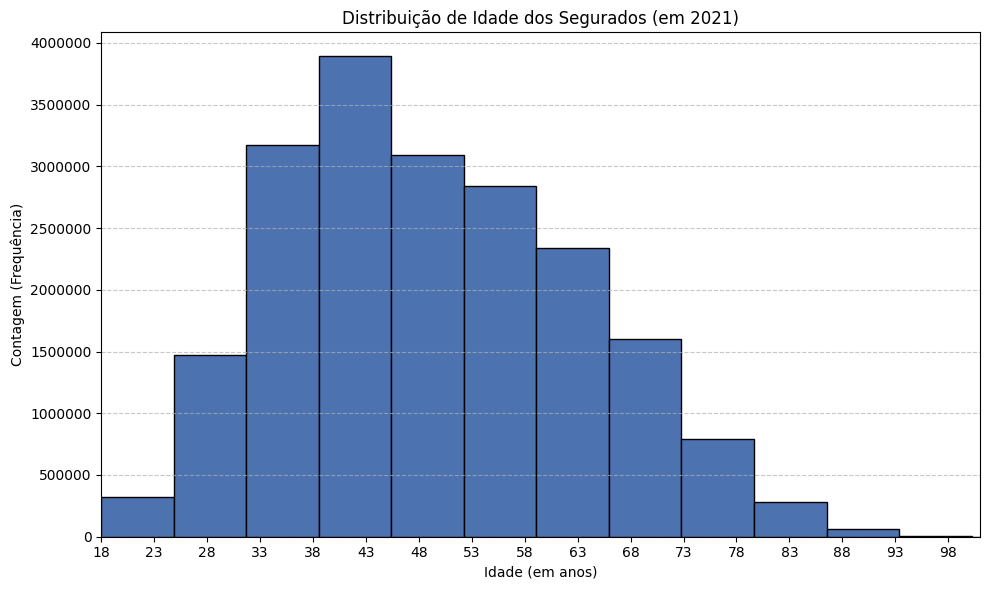

In [50]:
# --- Etapa 1: Calcular a Idade (base 2021) ---
# (Assumindo que 'df' está carregado e 'DATA_NASC' já é datetime)

# Defina a data de referência para o cálculo da idade
data_referencia = pd.to_datetime('2021-12-31')

# Calcula a diferença (dá em Timedelta, ex: "19458 days")
diferenca_tempo = data_referencia - df_mapeado['DATA_NASC']

# Converte para anos (float) e depois para inteiro
# (365.25 dias para contar anos bissextos)
df_mapeado['IDADE'] = (diferenca_tempo / pd.to_timedelta(365.25, 'D'))

# Vamos ver as primeiras idades calculadas
# print(df[['DATA_NASC', 'IDADE']].head())

# --- Etapa 2: Plotar o Histograma ---

# Remove idades inválidas (ex: se a data de nasc era nula ou se a idade for menor que 18)
idades_validas = df_mapeado['IDADE'][df_mapeado['IDADE'] >= 18].dropna()

fig, ax = plt.subplots(figsize=(10, 6)) # Histogramas ficam melhores mais largos

# 'bins=30' divide a faixa de idades em 30 "caixas". 
# 'edgecolor='k'' adiciona uma linha preta fina para separar as barras
ax.hist(idades_validas, bins=30, color='#4c72b0', edgecolor='black')

ax.set_title('Distribuição de Idade dos Segurados (em 2021)')
ax.set_xlabel('Idade (em anos)')
ax.set_ylabel('Contagem (Frequência)')

# Opcional: Adiciona linhas de grade para facilitar a leitura
ax.grid(axis='y', linestyle='--', alpha=0.7)

# 1. Ajuste do Eixo X (Limite)
ax.set_xlim(18, 101) 

# 2. Ajuste do Eixo Y (Notação)
ax.ticklabel_format(style='plain', axis='y')

# 3. NOVO AJUSTE: Mudar o "passo" do Eixo X
#    np.arange(início, fim_exclusive, passo)
#    Usamos 111 para que o 110 seja incluído.
ax.set_xticks(np.arange(18, 101, 5)) 

# --- FIM DOS AJUSTES ---

plt.tight_layout()
plt.show()

## apenas com amostragem

In [39]:
# --- 1. Certifique-se que 'df_mapeado' existe ---
# (Este é o DataFrame do passo anterior, após o merge e o dropna)
# df_mapeado = df_final.dropna(subset=['latitude', 'longitude'])

# Vamos verificar quantos pontos temos
total_mapeado = len(df_mapeado)
print(f"Total de pontos com coordenadas: {total_mapeado:,}")

# --- 2. Amostragem Aleatória ---
# Definimos um tamanho de amostra. 100k é um bom começo.
# Se for rápido, podemos aumentar para 500k. Se for lento, diminua para 50k.
N_AMOSTRA = 100000

# Se tivermos menos pontos que a amostra, usamos todos.
if total_mapeado > N_AMOSTRA:
    print(f"Pegando uma amostra aleatória de {N_AMOSTRA:,} pontos...")
    df_amostra = df_mapeado.sample(n=N_AMOSTRA, random_state=42)
else:
    print("Usando todos os pontos disponíveis (menos que a amostra definida)...")
    df_amostra = df_mapeado

# --- 3. Gerar o Mapa de Densidade (Heatmap) ---
print("Gerando o mapa de calor (density_mapbox)...")

fig = px.density_mapbox(
    df_amostra,
    lat='latitude',
    lon='longitude',
    radius=10,         # Raio de "influência" de cada ponto (ajuste se ficar muito fraco/forte)
    zoom=3.2,          # Nível de zoom inicial
    center={"lat": -15.79, "lon": -47.88}, # Centro do Brasil (Brasília)
    mapbox_style="carto-positron",    # Estilo do mapa de fundo (claro)
    title="Heatmap de Concentração de Seguros no Brasil"
)

# --- 4. Salvar o mapa como HTML ---
nome_arquivo = "heatmap_seguros_brasil.html"
fig.write_html(nome_arquivo)

print(f"\n--- SUCESSO! ---")
print(f"Mapa salvo como '{nome_arquivo}'.")
print("Abra este arquivo no seu navegador (Chrome, Firefox, etc.) para ver o mapa interativo.")

Total de pontos com coordenadas: 23,803,485
Pegando uma amostra aleatória de 100,000 pontos...
Gerando o mapa de calor (density_mapbox)...

--- SUCESSO! ---
Mapa salvo como 'heatmap_seguros_brasil.html'.
Abra este arquivo no seu navegador (Chrome, Firefox, etc.) para ver o mapa interativo.


C:\Users\lucas\AppData\Local\Temp\ipykernel_38796\687429686.py:25: DeprecationWarning:

*density_mapbox* is deprecated! Use *density_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



In [40]:
# --- (Assumindo que 'df_mapeado' já existe na memória) ---
# df_mapeado = df_final.dropna(subset=['latitude', 'longitude'])

# --- ETAPA 1: PREPARAR A COLUNA DE CEP ---
# A função 'cep_para_uf' espera um NÚMERO, mas a coluna
# 'CEP_UTIL' em 'df_mapeado' é uma STRING (do passo do merge).
# Vamos convertê-la de volta para numérico.
print("Preparando coluna 'CEP_UTIL' (convertendo para numérico)...")
df_mapeado['CEP_UTIL_NUM'] = pd.to_numeric(df_mapeado['CEP_UTIL'], errors='coerce')

# Remove linhas onde a conversão falhou (ex: CEPs com letras ou hífens)
df_mapeado = df_mapeado.dropna(subset=['CEP_UTIL_NUM'])
df_mapeado['CEP_UTIL_NUM'] = df_mapeado['CEP_UTIL_NUM'].astype(int)
print("Conversão para numérico concluída.")


# --- ETAPA 2: Função para converter CEP em UF (a sua função) ---
def cep_para_uf(cep):
    """Converte um número de CEP (int) para sua sigla de UF (str)."""
    if pd.isna(cep):
        return None
    prefixo = int(cep) // 1000 
    
    if 1000 <= prefixo <= 19999: return 'SP'
    if 20000 <= prefixo <= 28999: return 'RJ'
    if 29000 <= prefixo <= 29999: return 'ES'
    if 30000 <= prefixo <= 39999: return 'MG'
    if 40000 <= prefixo <= 48999: return 'BA'
    if 49000 <= prefixo <= 49999: return 'SE'
    if 50000 <= prefixo <= 56999: return 'PE'
    if 57000 <= prefixo <= 57999: return 'AL'
    if 58000 <= prefixo <= 58999: return 'PB'
    if 59000 <= prefixo <= 59999: return 'RN'
    if 60000 <= prefixo <= 63999: return 'CE'
    if 64000 <= prefixo <= 64999: return 'PI'
    if 65000 <= prefixo <= 65999: return 'MA'
    if 66000 <= prefixo <= 68899: return 'PA'
    if 68900 <= prefixo <= 68999: return 'AP'
    if 69000 <= prefixo <= 69299: return 'AM'
    if 69300 <= prefixo <= 69399: return 'RR'
    if 69400 <= prefixo <= 69899: return 'AM'
    if 69900 <= prefixo <= 69999: return 'AC'
    if 70000 <= prefixo <= 72799: return 'DF'
    if 72800 <= prefixo <= 76799: return 'GO'
    if 76800 <= prefixo <= 76999: return 'RO'
    if 77000 <= prefixo <= 77999: return 'TO'
    if 78000 <= prefixo <= 78899: return 'MT'
    if 78900 <= prefixo <= 78999: return 'RO'
    if 79000 <= prefixo <= 79999: return 'MS'
    if 80000 <= prefixo <= 87999: return 'PR'
    if 88000 <= prefixo <= 89999: return 'SC'
    if 90000 <= prefixo <= 99999: return 'RS'
    return None 

# --- ETAPA 3: Aplicar a função e Agregar (NOS DADOS VALIDADOS) ---
print("Iniciando mapeamento de CEP para UF (nos 75% de dados validados)...")
# Aplicamos na nova coluna numérica
df_mapeado['UF'] = df_mapeado['CEP_UTIL_NUM'].apply(cep_para_uf)
print("Mapeamento concluído.")

# Contar os seguros por UF (dos dados validados)
contagem_uf_validada = df_mapeado['UF'].value_counts().reset_index()
contagem_uf_validada.columns = ['UF', 'Contagem']

# Remover UFs nulas
contagem_uf_validada = contagem_uf_validada.dropna(subset=['UF'])

print("\nContagem de seguros por UF (CEPs Validados - Top 5):")
print(contagem_uf_validada.head())


# --- ETAPA 4: Plotar o Mapa (Choropleth) ---
url_geojson = "https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson"

try:
    print("\nBaixando o molde do mapa do Brasil (GeoJSON)...")
    geojson_br = requests.get(url_geojson).json()
    print("Mapa baixado com sucesso.")

    # Criar o mapa de calor
    fig = px.choropleth_mapbox(
        contagem_uf_validada, # <-- Usando o novo DataFrame
        geojson=geojson_br,
        locations='UF',         
        featureidkey="properties.sigla", 
        color='Contagem',       
        color_continuous_scale="Viridis", 
        mapbox_style="carto-positron",    
        zoom=3.2,                 
        center={"lat": -15.79, "lon": -47.88}, 
        opacity=0.7,
        title="Distribuição de Seguros por Estado (Apenas CEPs Validados)" # <-- Título atualizado
    )
    
    fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
    
    # Salvar o mapa com um novo nome
    nome_arquivo = "mapa_seguros_por_uf_VALIDADOS.html"
    fig.write_html(nome_arquivo)
    
    print(f"\n--- SUCESSO! ---")
    print(f"Mapa salvo como '{nome_arquivo}'.")
    print("Abra este arquivo para ver o mapa interativo dos dados validados.")

except Exception as e:
    print(f"\n--- ERRO ---")
    print(f"Não foi possível baixar ou processar o mapa: {e}")

Preparando coluna 'CEP_UTIL' (convertendo para numérico)...


C:\Users\lucas\AppData\Local\Temp\ipykernel_38796\1288330279.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Conversão para numérico concluída.
Iniciando mapeamento de CEP para UF (nos 75% de dados validados)...
Mapeamento concluído.

Contagem de seguros por UF (CEPs Validados - Top 5):
   UF  Contagem
0  SP   7996531
1  MG   2712452
2  PR   2451263
3  RS   2209536
4  SC   1646354

Baixando o molde do mapa do Brasil (GeoJSON)...
Mapa baixado com sucesso.


C:\Users\lucas\AppData\Local\Temp\ipykernel_38796\1288330279.py:81: DeprecationWarning:

*choropleth_mapbox* is deprecated! Use *choropleth_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/




--- SUCESSO! ---
Mapa salvo como 'mapa_seguros_por_uf_VALIDADOS.html'.
Abra este arquivo para ver o mapa interativo dos dados validados.
